In [40]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with sound
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

In [41]:
data_path = "/content/drive/MyDrive/heart_sound"

In [42]:
tarin_data = data_path +"/train/"
val_data   = data_path + "/val/"

train_healthy_data   = tarin_data + '/healthy/'
train_unhealthy_data = tarin_data + '/unhealthy/'
val_healthy_data     = val_data   + '/healthy/'
val_unhealthy_data   = val_data   + '/unhealthy/'

In [43]:
print(os.listdir(data_path))

['val', 'train']


In [44]:
print(len(os.listdir(train_healthy_data))) #length of healthy training sounds
print(len(os.listdir(train_unhealthy_data))) #length of unhelathy training sounds 
print('TOTAL TRAIN SOUNDS:', len(os.listdir(train_healthy_data)) + len(os.listdir(train_unhealthy_data)))

2575
2163
TOTAL TRAIN SOUNDS: 4738


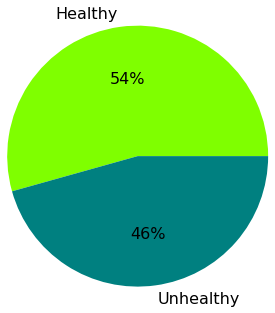

In [45]:
x = np.array([len(os.listdir(train_healthy_data)),len(os.listdir(train_unhealthy_data))])
labels = ['Healthy', 'Unhealthy']
colors = {'Healthy': 'chartreuse','Unhealthy': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

In [46]:
# Choose random soud from healthy folder
random_healthy= np.random.randint(0,len(os.listdir(train_healthy_data))) 
healthy_sound = os.listdir(train_healthy_data)[random_healthy]
healthy_sound_address = train_healthy_data+healthy_sound
healthy_sound_sample,sample_rate = librosa.load(healthy_sound_address)
ipd.Audio(healthy_sound_sample,rate=sample_rate)

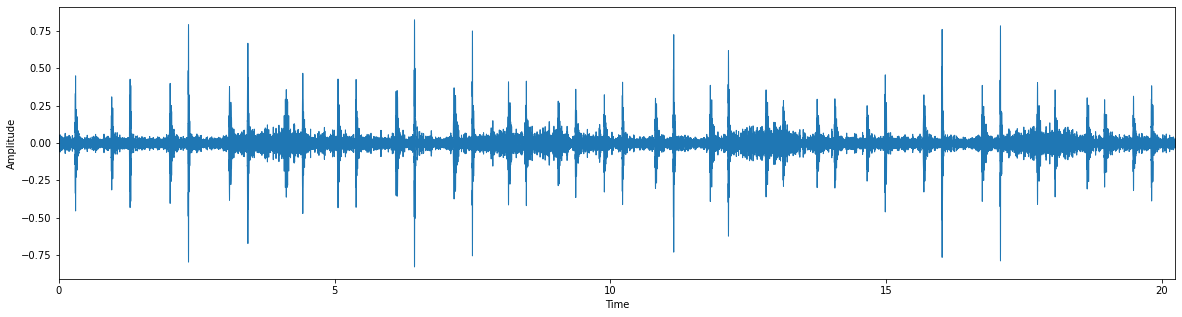

In [47]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(healthy_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

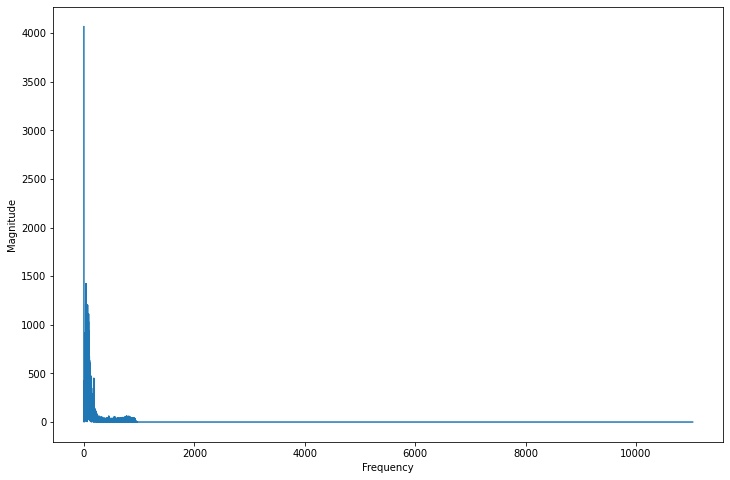

In [48]:
fft_healthy = np.fft.fft(healthy_sound_sample)
magnitude_healthy = np.abs(fft_healthy)
freq_healthy = np.linspace(0,sample_rate, len(magnitude_healthy)) 
half_freq = freq_healthy[:int(len(freq_healthy)/2)]
half_magnitude = magnitude_healthy[:int(len(freq_healthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

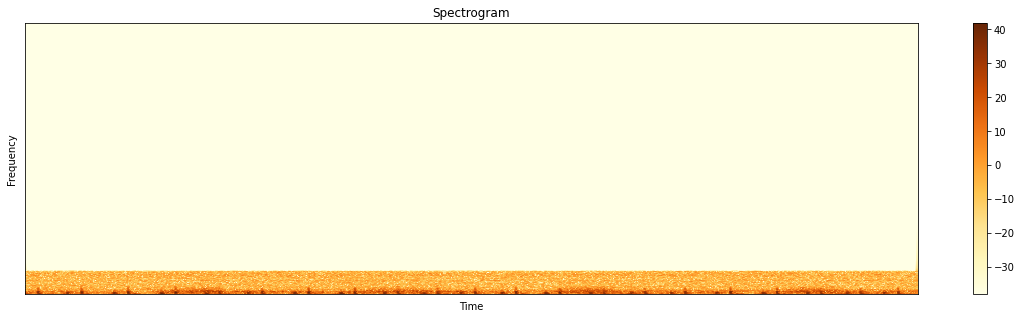

In [49]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_healthy = librosa.stft(healthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_healthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

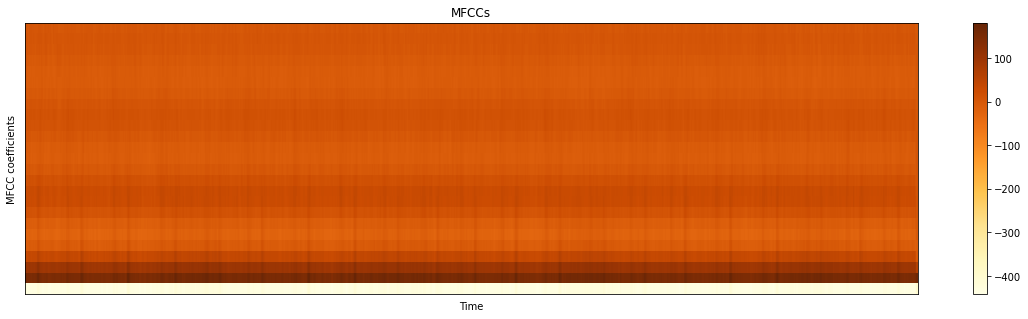

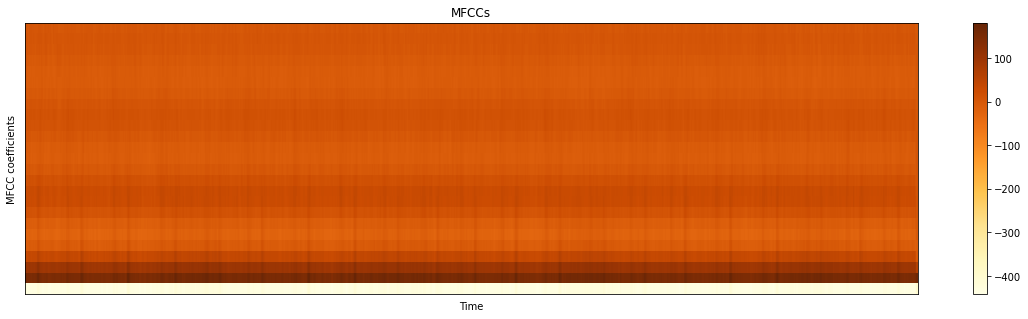

In [50]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(healthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(20,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(healthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(20,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [51]:
# Choose random soud from unhealthy folder
random_unhealthy= np.random.randint(0,len(os.listdir(train_unhealthy_data))) 
unhealthy_sound = os.listdir(train_unhealthy_data)[random_unhealthy]
unhealthy_sound_address = train_unhealthy_data+unhealthy_sound
unhealthy_sound_sample,sample_rate = librosa.load(unhealthy_sound_address)
ipd.Audio(unhealthy_sound_sample,rate=sample_rate)

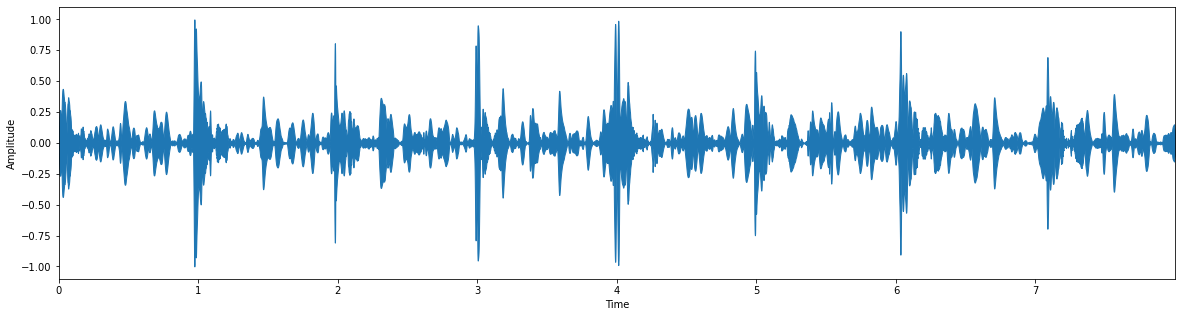

In [52]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(unhealthy_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

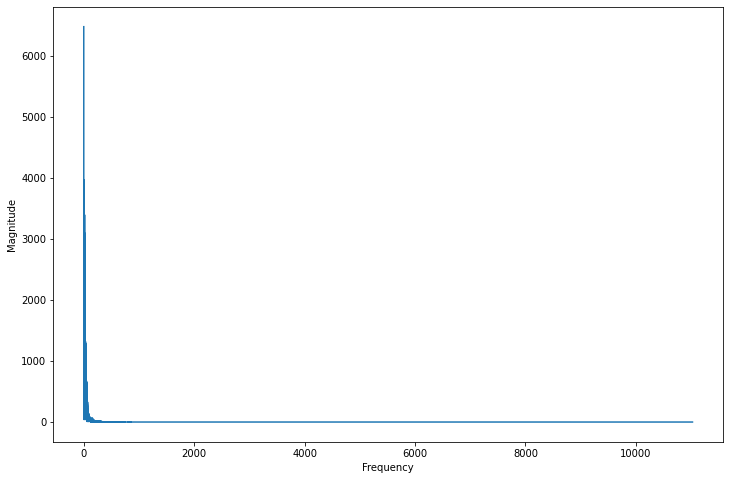

In [53]:
fft_unhealthy = np.fft.fft(unhealthy_sound_sample)
magnitude_unhealthy = np.abs(fft_unhealthy)
freq_unhealthy = np.linspace(0,sample_rate, len(magnitude_unhealthy)) 
half_freq = freq_unhealthy[:int(len(freq_unhealthy)/2)]
half_magnitude = magnitude_unhealthy[:int(len(freq_unhealthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

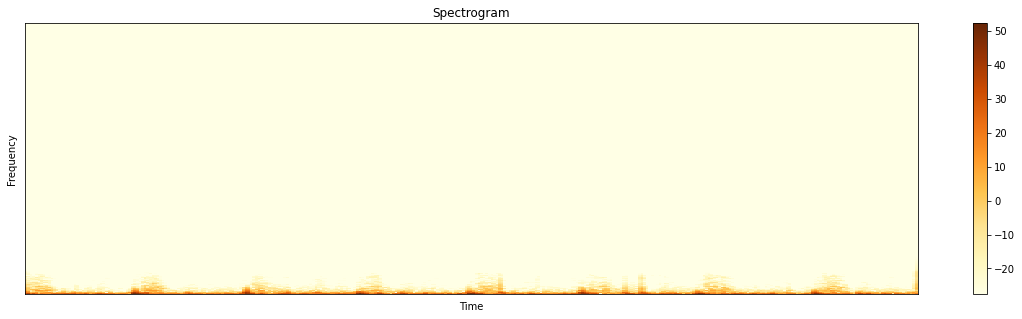

In [54]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_unhealthy = librosa.stft(unhealthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_unhealthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

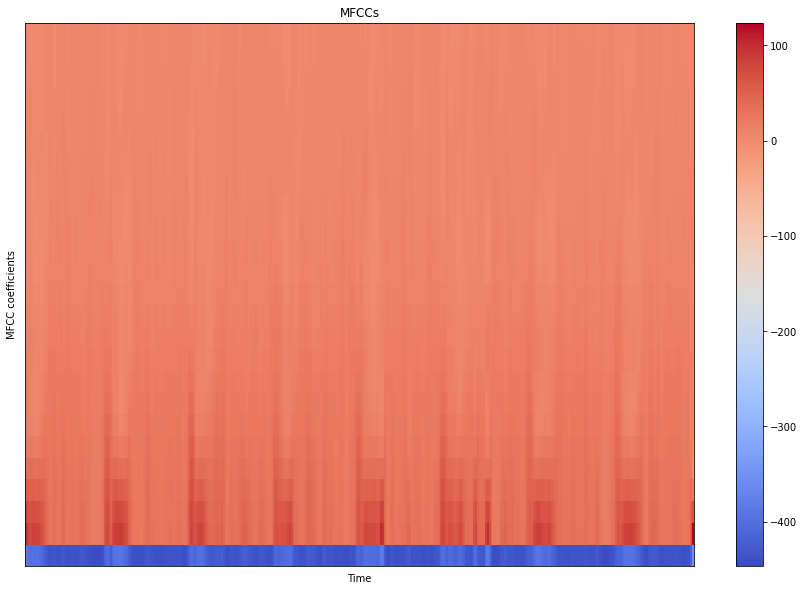

In [55]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(unhealthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [56]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration

    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [57]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['healthy','unhealthy']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'healthy': 0, 'unhealthy': 1}
 
{0: 'healthy', 1: 'unhealthy'}


In [58]:
# KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

healthy_files = fnmatch.filter(os.listdir(train_healthy_data), '*.wav')
healthy_sounds = load_file_data (folder=train_healthy_data, file_names = healthy_files, duration=MAX_SOUND_CLIP_DURATION)
healthy_labels = [0 for items in healthy_files]



print ("loaded dataset")

load file  /content/drive/MyDrive/heart_sound/train//healthy/e01119.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01050.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01101.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e00985.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01064.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01140.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01132.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e00982.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01120.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01090.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01061.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01088.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01093.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01

In [59]:
unhealthy_files = fnmatch.filter(os.listdir(train_unhealthy_data), '*.wav')
unhealthy_sounds = load_file_data(folder=train_unhealthy_data,file_names=unhealthy_files, duration=MAX_SOUND_CLIP_DURATION)
unhealthy_labels = [1 for items in unhealthy_sounds]

load file  /content/drive/MyDrive/heart_sound/train//unhealthy/ap1a0321.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/at1a0321.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/an1a0321.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/ap1a0200.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/at1a0200.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/an1a0200.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/ap1a0197.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/at1a0197.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/an1a0197.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/ap1a0324.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/at1a0324.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/an1a0324.wav
load file  /content/drive/MyDrive/heart_sound/train//unhealthy/ap1a0307.wav
load file  /

In [60]:
# test files
val_healthy_files = fnmatch.filter(os.listdir(val_healthy_data), '*.wav')
val_healthy_sounds = load_file_data(folder=val_healthy_data,file_names=val_healthy_files, duration=MAX_SOUND_CLIP_DURATION)
val_healthy_labels = [0 for items in val_healthy_sounds]

val_unhealthy_files = fnmatch.filter(os.listdir(val_unhealthy_data), '*.wav')
val_unhealthy_sounds = load_file_data(folder=val_unhealthy_data,file_names=val_unhealthy_files, duration=MAX_SOUND_CLIP_DURATION)
val_unhealthy_labels = [1 for items in val_unhealthy_sounds]


print ("loaded test dataset")

load file  /content/drive/MyDrive/heart_sound/val//healthy/a0069.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/a0091.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/e00029.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/b0002.wav
fixing audio lenght : b0002.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/e00014.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/a0086.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/b0061.wav
fixing audio lenght : b0061.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/d0007.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/a0012.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/e00011.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/c0006.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/e00007.wav
load file  /content/drive/MyDrive/heart_sound/val//healthy/b0060.wav
fixing audio lenght : b0060.wav
loa

In [62]:
import librosa
import numpy as np

def augment_audio(audio, sample_rate, augmentation_factor=2):
    augmented_audio = []
    for i in range(augmentation_factor):
        # Apply random pitch shift
        audio_pitch_shifted = librosa.effects.pitch_shift(audio, sample_rate, n_steps=np.random.uniform(-4, 4))
        
        # Apply random time stretch
        stretch_factor = np.random.uniform(0.8, 1.2)
        audio_stretched = librosa.effects.time_stretch(audio_pitch_shifted, stretch_factor)
        
        # Add random noise
        noise = np.random.normal(0, 0.1, audio_stretched.shape[0])
        audio_noisy = audio_stretched + noise
        
        # Store augmented audio
        augmented_audio.append(audio_noisy)
    
    return np.array(augmented_audio)

In [63]:


x_data = np.concatenate((healthy_sounds, unhealthy_sounds))

y_data = np.concatenate((healthy_labels,unhealthy_labels))

test_x = np.concatenate((val_healthy_sounds,val_unhealthy_sounds))
test_y = np.concatenate((val_healthy_labels,val_unhealthy_labels))

print ("combined training data record: ",len(y_data), len(test_y))



combined training data record:  4738 301


In [64]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 100
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [65]:


print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)



label shape:  (4738,)
data size of the array: : 4738
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  37904
0

audio data shape:  (4738, 25, 1)
data size of the array: : 118450
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  473800

training data shape:  (3032, 25, 1)
training label shape:  (3032, 2)

validation data shape:  (758, 25, 1)
validation label shape:  (758, 2)

test data shape:  (948, 25, 1)
test label shape:  (948, 2)


In [66]:
TRAIN_IMG_COUNT = 4738
COUNT_0 = 2575  #healthy
COUNT_1 = 2163 #unhealthy
weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.92, 1: 1.0952380952380953}

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Bidirectional
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [68]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [69]:
from tensorflow.keras.layers import Conv2D

In [71]:
model = Sequential()

model.add(Conv2D(32, (1,1), activation='relu', input_shape=(25, 1, 1)))
model.add(MaxPooling2D(1,1))
model.add(Conv2D(64, (1,1), activation='relu'))
model.add(MaxPooling2D(1,1))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['acc'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 1, 32)         64        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 1, 64)         2112      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 1, 64)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [72]:
print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=16, 
                  epochs=50,
                  validation_data=(x_val, y_val)) 

print ("training finised!")

training started..... please wait.
Epoch 1/50
190/190 [==============================] - 6s 10ms/step - loss: 0.7971 - acc: 0.6596 - val_loss: 0.4988 - val_acc: 0.7335
Epoch 2/50
190/190 [==============================] - 1s 8ms/step - loss: 0.5174 - acc: 0.7431 - val_loss: 0.4037 - val_acc: 0.8113
Epoch 3/50
190/190 [==============================] - 2s 8ms/step - loss: 0.4413 - acc: 0.8021 - val_loss: 0.3888 - val_acc: 0.8536
Epoch 4/50
190/190 [==============================] - 2s 8ms/step - loss: 0.3953 - acc: 0.8265 - val_loss: 0.2988 - val_acc: 0.8668
Epoch 5/50
190/190 [==============================] - 2s 9ms/step - loss: 0.3674 - acc: 0.8348 - val_loss: 0.2877 - val_acc: 0.8945
Epoch 6/50
190/190 [==============================] - 2s 13ms/step - loss: 0.3546 - acc: 0.8384 - val_loss: 0.3009 - val_acc: 0.8562
Epoch 7/50
190/190 [==============================] - 2s 11ms/step - loss: 0.3412 - acc: 0.8417 - val_loss: 0.2719 - val_acc: 0.8931
Epoch 8/50
190/190 [==================

<AxesSubplot:>

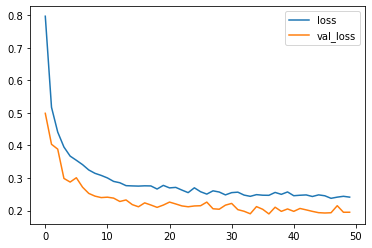

In [73]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

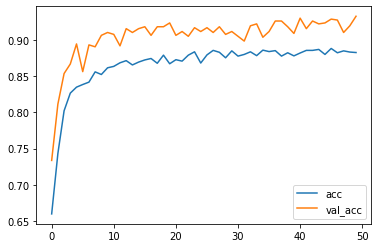

In [74]:
losses[['acc','val_acc']].plot()

In [75]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

30/30 [==============================] - 0s 3ms/step - loss: 0.2005 - acc: 0.9188
Model evaluation accuracy:  92 %


In [76]:
y_pred = np.asarray(model.predict(x_test, batch_size=16))
y_pred = np.argmax(y_pred,axis=1)

60/60 [==============================] - 0s 4ms/step


In [77]:
target_names = ["Healthy", "Unhealthy"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Healthy       0.93      0.92      0.93       514
   Unhealthy       0.91      0.91      0.91       434

    accuracy                           0.92       948
   macro avg       0.92      0.92      0.92       948
weighted avg       0.92      0.92      0.92       948



30/30 [==============================] - 0s 7ms/step


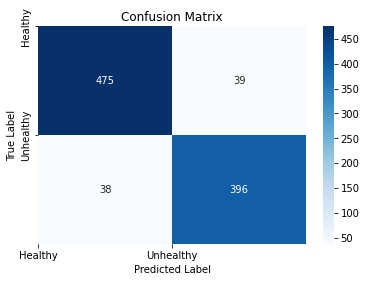

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

target_names = ["Healthy", "Unhealthy"]
y_true = y_test.argmax(axis=1)
y_pred = model.predict(x_test).argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(target_names)), target_names)
plt.yticks(np.arange(len(target_names)), target_names)
plt.show()